# Parkinson's dataset analysis

We use the parkinson's dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Parkinsons).<br>
In this notebook we'll discuss the following points:
* Does every feature is useful to predict the status of a patient?
* Which are the best features to predict the status of a patient?


Let's start by importing the neccessary

In [2]:
# import

# data storage
import pandas as pd

# model selection
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# build and test models
from model import get_X, Tester, get_models

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# some utility
from itertools import combinations

print("All packages are loaded")

All packages are loaded


## Exploratory data analysis

In [3]:
#data loaded
file = "parkinsons.csv"
data = pd.read_csv(file)

#drop of unuseful and repeat column
data.drop(["name", "MDVP:Jitter(Abs)", "MDVP:Shimmer"], axis=1, inplace=True)

#data inspection
display(data.info())
display(data.head())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:RAP          195 non-null    float64
 5   MDVP:PPQ          195 non-null    float64
 6   Jitter:DDP        195 non-null    float64
 7   MDVP:Shimmer(dB)  195 non-null    float64
 8   Shimmer:APQ3      195 non-null    float64
 9   Shimmer:APQ5      195 non-null    float64
 10  MDVP:APQ          195 non-null    float64
 11  Shimmer:DDA       195 non-null    float64
 12  NHR               195 non-null    float64
 13  HNR               195 non-null    float64
 14  status            195 non-null    int64  
 15  RPDE              195 non-null    float64
 16  DFA               195 non-null    float64
 1

None

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00370,0.00554,0.01109,0.426,0.02182,0.03130,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00465,0.00696,0.01394,0.626,0.03134,0.04518,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00544,0.00781,0.01633,0.482,0.02757,0.03858,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00502,0.00698,0.01505,0.517,0.02924,0.04005,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00655,0.00908,0.01966,0.584,0.03490,0.04825,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.003306,0.003446,0.009920,0.282251,0.015664,0.017878,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.002968,0.002759,0.008903,0.194877,0.010153,0.012024,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000680,0.000920,0.002040,0.085000,0.004550,0.005700,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.001660,0.001860,0.004985,0.148500,0.008245,0.009580,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.002500,0.002690,0.007490,0.221000,0.012790,0.013470,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.003835,0.003955,0.011505,0.350000,0.020265,0.022380,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.021440,0.019580,0.064330,1.302000,0.056470,0.079400,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


>This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.
<i><b>UCI Machine learning repository</b></i>

There are 147 measurements with parkinson and 48 one without parkinson. Here is the description of each feature
<table>
<tr>
<th>Features</th>
<th>Description</th>
</tr>
<tr>
<td>MDVP:F0 (Hz)</td>
<td>Average vocal fundamental frequency</td>
</tr>
<tr>
<td>MDVP:Fhi (Hz)</td>
<td>Maximum vocal fundamental frequency</td>
</tr>
<tr>
<td>MDVP:Flo (Hz)</td>
<td>Minimum vocal fundamental frequency</td>
</tr>
<tr>
<td>MDVP:Jitter(%)</td>
<td>MDVP jitter in percentage</td>
</tr>
<tr>
<td>MDVP:RAP</td>
<td>MDVP relative amplitude perturbation</td>
</tr>
<tr>
<td>MDVP:PPQ</td>
<td>MDVP five-point period perturbation quotient</td>
</tr>
<tr>
<td>Jitter:DDP</td>
<td>Average absolute difference of differences between jitter cycles</td>
</tr>
<tr>
<td>MDVP:Shimmer(dB</td>
<td>MDVP local shimmer in dB</td>
</tr>
<tr>
<td>Shimmer:APQ3</td>
<td>Three-point amplitude perturbation quotient</td>
</tr>
<tr>
<td>Shimmer:APQ5</td>
<td>Five-point amplitude perturbation quotient</td>
</tr>
<tr>
<td>MDVP:APQ11</td>
<td>MDVP 11-point amplitude perturbation quotient</td>
</tr>
<tr>
<td>Shimmer:DDA</td>
<td>Average absolute differences between the amplitudes of consecutive periods</td>
</tr>
<tr>
<td>NHR</td>
<td>Noise-to-harmonics rati</td>
</tr>
<tr>
<td>HNR</td>
<td>Harmonics-to-noise ratio</td>
</tr>
<tr>
<td>RPDE</td>
<td>Recurrence period density entropy measure</td>
</tr>
<tr>
<td>D2</td>
<td>Correlation dimension</td>
</tr>
<tr>
<td>DFA</td>
<td>Signal fractal scaling exponent of detrended fluctuation analysis</td>
</tr>
<tr>
<td>Spread1</td>
<td>Two nonlinear measures of fundamental</td>
</tr>
<tr>
<td>Spread2</td>
<td>Frequency variation</td>
</tr>
<tr>
<td>PPE</td>
<td>Pitch period entropy</td>
</tr>
</table>

Let's get a look on how the features are correlate between them.

WE have 12 features correlate over 90%:, MDVP:RAP, MDVP:APQ, PPE, spread1, Jitter:DDP, Shimmer:APQ3, Shimmer:APQ5, NHR, Shimmer:DDA, MDVP:PPQ, MDVP:Jitter(%), MDVP:Shimmer(dB).

Here is their correlations:

corr(MDVP:Jitter(%),MDVP:RAP) = 99.03%
corr(MDVP:Jitter(%),MDVP:PPQ) = 97.43%
corr(MDVP:Jitter(%),Jitter:DDP) = 99.03%
corr(MDVP:Jitter(%),NHR) = 90.7%
corr(MDVP:RAP,MDVP:PPQ) = 95.73%
corr(MDVP:RAP,Jitter:DDP) = 100.0%
corr(MDVP:RAP,NHR) = 91.95%
corr(MDVP:PPQ,Jitter:DDP) = 95.73%
corr(Jitter:DDP,NHR) = 91.95%
corr(MDVP:Shimmer(dB),Shimmer:APQ3) = 96.32%
corr(MDVP:Shimmer(dB),Shimmer:APQ5) = 97.38%
corr(MDVP:Shimmer(dB),MDVP:APQ) = 96.1%
corr(MDVP:Shimmer(dB),Shimmer:DDA) = 96.32%
corr(Shimmer:APQ3,Shimmer:APQ5) = 96.01%
corr(Shimmer:APQ3,Shimmer:DDA) = 100.0%
corr(Shimmer:APQ5,MDVP:APQ) = 94.91%
corr(Shimmer:APQ5,Shimmer:DDA) = 96.01%
corr(spread1,PPE) = 96.24%

Features's correlation with the status:

corr(MDVP:Fo(Hz),status) = -38.35%
corr(MDVP:Fhi(Hz),status) = -16.61%
corr(MDV

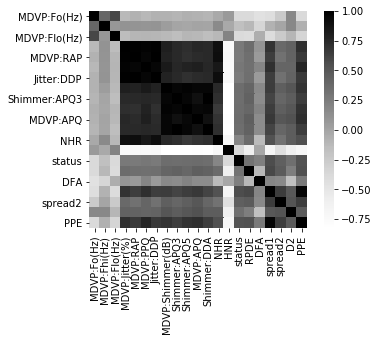

In [4]:
# Vizualisation of correlations between each features and status

# target
target = "status"

# features names
features = list(data.columns)
features.remove("status")

# correlations matrix
corr = data.corr()

# heatmat plot of the correlations
sns.heatmap(corr, square=True, cmap="Greys")

# all pair of features
pair_feature = list(combinations(features, 2))

# couples of features correlate over 90%
highly_corr = [(f1, f2) for (f1, f2) in pair_feature if corr.loc[f1, f2]>=0.9 ]

# set of features correlate over 90%
highly_corr_set = set()
for f1, f2 in highly_corr:
    highly_corr_set.add(f1)
    highly_corr_set.add(f2)

print("WE have "+str(len(highly_corr_set))+" features correlate over 90%:", *highly_corr_set, sep=", ", end=".\n\n")
print("Here is their correlations:")
print()
for f1, f2 in highly_corr:
    print("corr({},{}) = {}%".format(f1, f2, round(corr.loc[f1, f2]*100,2)))
    
# Features's correlation with the status
print()
print("Features's correlation with the status:")
print()
for f in features:
    print("corr({},status) = {}%".format(f, round(corr.loc[f, "status"]*100,2)))


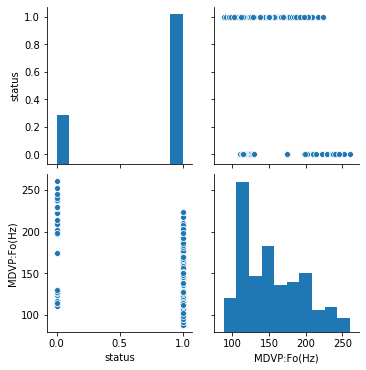

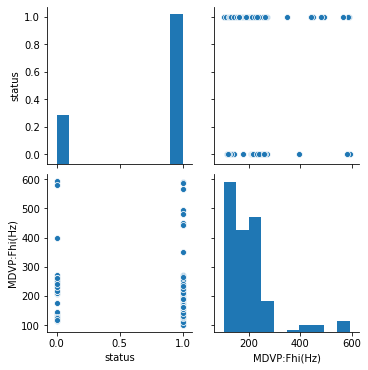

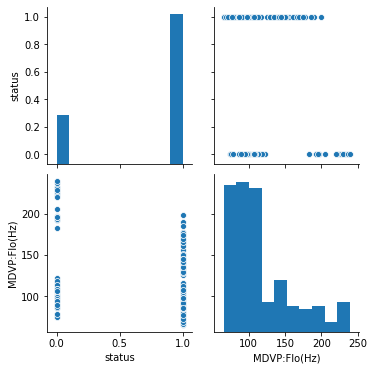

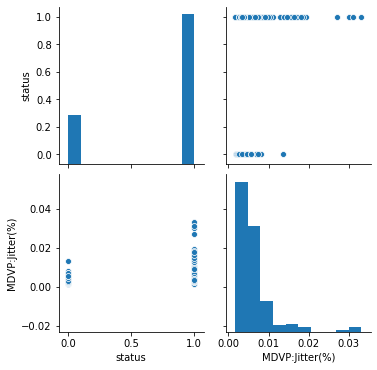

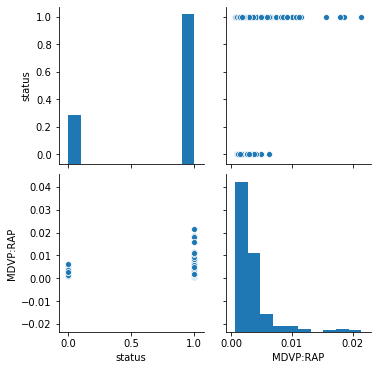

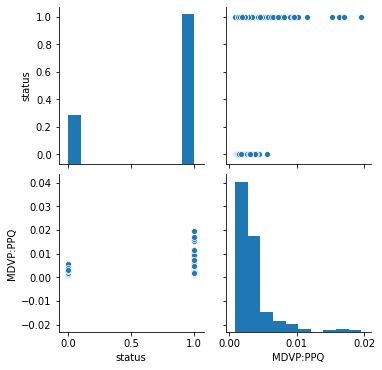

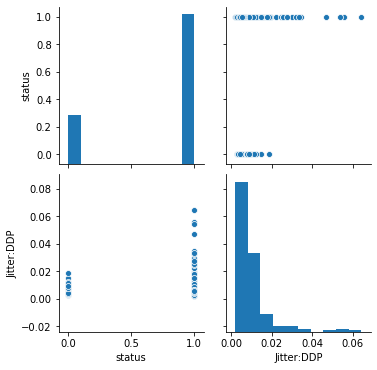

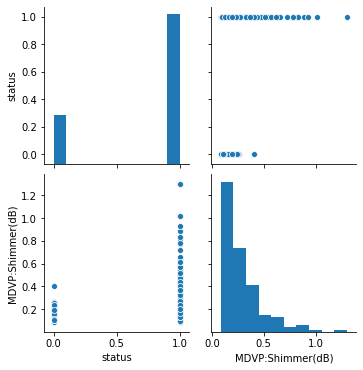

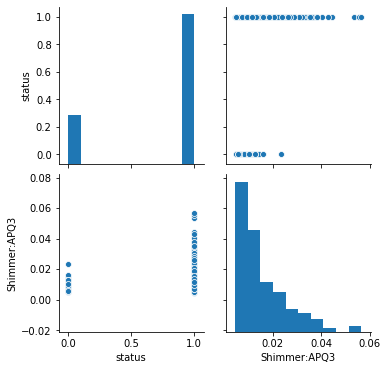

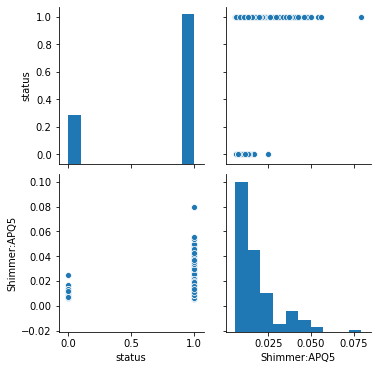

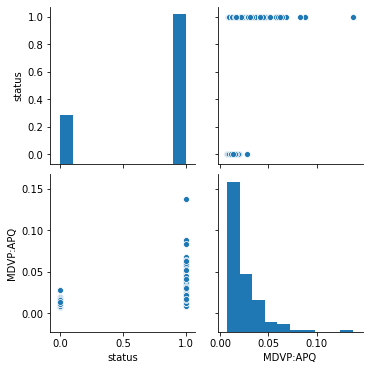

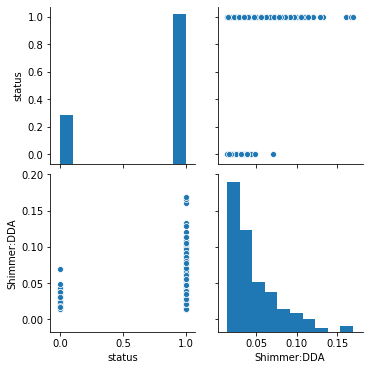

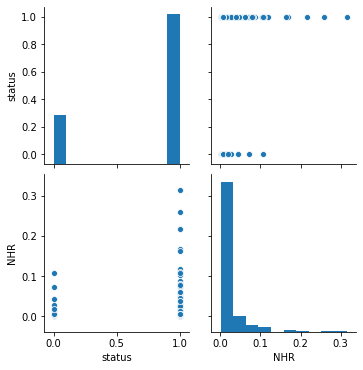

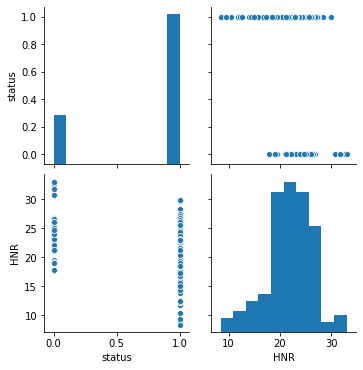

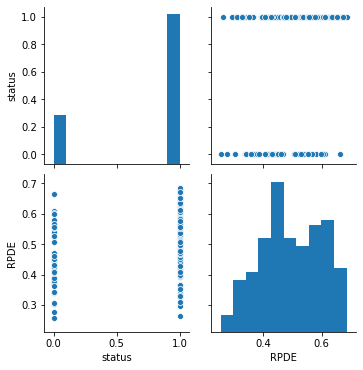

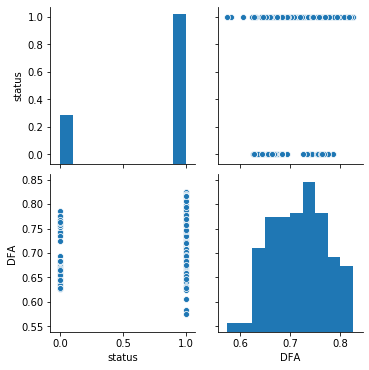

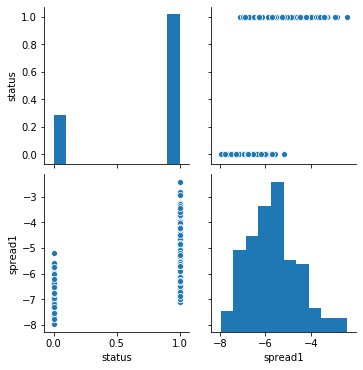

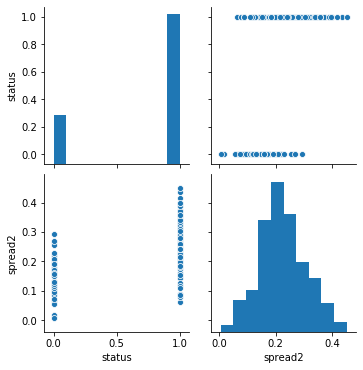

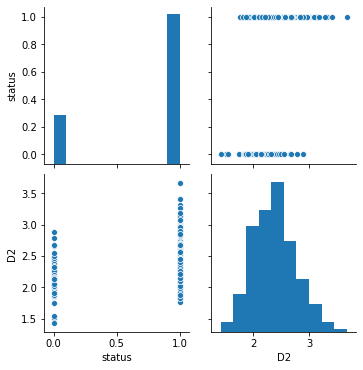

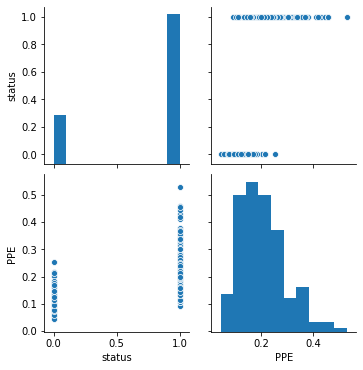

In [5]:
#visualization of the relations between each feature and target 
for feature in features:
    sns.pairplot(data.loc[:, [target, feature]])

   ## Models for prediction

Since the status variable is a binary target, we'll perform some classification model on the data; in our case we'll the fifth classifiers below:

* Logistic regression
* K-Nearest Neighbors (KNN)
* Support Vector Classifier (SVC)
* AdaBoost
* XgBoost



In [6]:
# target vector
y = data.loc[:, target]
    
print("All is ready!")

All is ready!


### Features selection

#### First selection

In [7]:
# data to build our models
X = get_X(data, features)

# models
models = get_models()


display("X shape:"+str(X.shape), "y shape:"+str(y.shape))

tester = Tester(models, X, y)
tester.test()

'X shape:(195, 20)'

'y shape:(195,)'

Logistic Regression
  Roc_auc_score: 0.8483333333333333 (84.833%)


KNN
  Best parameter: {'n_neighbors': 6}
  Best roc_auc_score: 0.8977142857142857 (89.771%)


SVC
  Best parameter: {'degree': 1}
  Best roc_auc_score: 0.8135238095238095 (81.352%)


AdaBoost
  Best parameter: {'n_estimators': 4}
  Best roc_auc_score: 0.8320952380952382 (83.21%)


XgBoost
  Roc_auc_score: 0.9128095238095237 (91.281%)


All tests are done


In [8]:
best_model = tester.best_model()
print("For this test {} give us the best Roc_auc_score of {}%.".format(best_model.name, round(best_model.score*100,3)))

For this test XgBoost give us the best Roc_auc_score of 91.281%.


#### Second selection

In [9]:
#features selection
exclude = list(zip(*highly_corr))[0]

features_selected1 = [feature for feature in features if feature not in exclude ]
print("We have "+str(len(features_selected1))+" features selected:")
print(*features_selected1, sep=", ")

We have 12 features selected:
MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread2, D2, PPE


In [10]:
# data to build our models
X = get_X(data, features_selected1)

# models refresh
models = get_models()


display("X shape:"+str(X.shape), "y shape:"+str(y.shape))

tester = Tester(models, X, y)
tester.test()

'X shape:(195, 12)'

'y shape:(195,)'

Logistic Regression
  Roc_auc_score: 0.8434285714285714 (84.343%)


KNN
  Best parameter: {'n_neighbors': 3}
  Best roc_auc_score: 0.903095238095238 (90.31%)


SVC
  Best parameter: {'degree': 1}
  Best roc_auc_score: 0.8109999999999999 (81.1%)


AdaBoost
  Best parameter: {'n_estimators': 4}
  Best roc_auc_score: 0.8684761904761904 (86.848%)


XgBoost
  Roc_auc_score: 0.9168095238095237 (91.681%)


All tests are done


In [11]:
best_model = tester.best_model()
print("For this test {} give us the best Roc_auc_score of {}%.".format(best_model.name, round(best_model.score*100,3)))

For this test XgBoost give us the best Roc_auc_score of 91.681%.


#### Third selection

In [12]:
#features selection
exclude = list(zip(*highly_corr))[1]

features_selected2 = [feature for feature in features if feature not in exclude ]
features_selected2 = list(set(features_selected2))

print("We have "+str(len(features_selected2))+" features selected:")
print(*features_selected2, sep=", ")

We have 11 features selected:
spread1, MDVP:Flo(Hz), DFA, MDVP:Fhi(Hz), spread2, MDVP:Fo(Hz), RPDE, D2, HNR, MDVP:Jitter(%), MDVP:Shimmer(dB)


In [13]:
# data to build our models
X = get_X(data, features_selected2)

# models refresh
models = get_models()


display("X shape:"+str(X.shape), "y shape:"+str(y.shape))

tester = Tester(models, X, y)
tester.test()

'X shape:(195, 11)'

'y shape:(195,)'

Logistic Regression
  Roc_auc_score: 0.8524761904761904 (85.248%)


KNN
  Best parameter: {'n_neighbors': 7}
  Best roc_auc_score: 0.9039523809523808 (90.395%)


SVC
  Best parameter: {'degree': 1}
  Best roc_auc_score: 0.8186666666666665 (81.867%)


AdaBoost
  Best parameter: {'n_estimators': 8}
  Best roc_auc_score: 0.8527619047619048 (85.276%)


XgBoost
  Roc_auc_score: 0.9116666666666667 (91.167%)


All tests are done


In [14]:
best_model = tester.best_model()
print("For this test {} give us the best Roc_auc_score of {}%.".format(best_model.name, round(best_model.score*100,3)))

For this test XgBoost give us the best Roc_auc_score of 91.167%.


#### Fourth selection

In [15]:
#features selection
features_selected3 = set(features) - highly_corr_set
features_selected3 = list(features_selected3)

print("We have "+str(len(features_selected3))+" features selected:")
print(*features_selected3, sep=", ")

We have 8 features selected:
DFA, MDVP:Flo(Hz), MDVP:Fhi(Hz), spread2, MDVP:Fo(Hz), RPDE, D2, HNR


In [16]:
# data to build our models
X = get_X(data, features_selected3)

# models refresh
models = get_models()


display("X shape:"+str(X.shape), "y shape:"+str(y.shape))

tester = Tester(models, X, y)
tester.test()

'X shape:(195, 8)'

'y shape:(195,)'

Logistic Regression
  Roc_auc_score: 0.8109999999999999 (81.1%)


KNN
  Best parameter: {'n_neighbors': 8}
  Best roc_auc_score: 0.877952380952381 (87.795%)


SVC
  Best parameter: {'degree': 1}
  Best roc_auc_score: 0.8289523809523809 (82.895%)


AdaBoost
  Best parameter: {'n_estimators': 18}
  Best roc_auc_score: 0.791952380952381 (79.195%)


XgBoost
  Roc_auc_score: 0.9093809523809524 (90.938%)


All tests are done


In [17]:
best_model = tester.best_model()
print("For this test {} give us the best Roc_auc_score of {}%.".format(best_model.name, round(best_model.score*100,3)))

For this test XgBoost give us the best Roc_auc_score of 90.938%.


#### Fifth selection

In [18]:
#features selection
exclude  = set()
for f1, f2 in highly_corr:
    if corr.loc[f1, target] <= corr.loc[f2, target]:
        exclude.add(f1)
    else:
        exclude.add(f2)
exclude = list(exclude)

features_selected4 = [feature for feature in features if feature not in exclude ]
features_selected4 = list(set(features_selected4))

print("We have "+str(len(features_selected4))+" features selected:")
print(*features_selected4, sep=", ")

We have 11 features selected:
spread1, MDVP:Flo(Hz), DFA, MDVP:Fhi(Hz), spread2, MDVP:Fo(Hz), RPDE, D2, HNR, MDVP:PPQ, MDVP:APQ


In [19]:
# data to build our models
X = get_X(data, features_selected4)

# models refresh
models = get_models()


display("X shape:"+str(X.shape), "y shape:"+str(y.shape))

tester = Tester(models, X, y)
tester.test()

'X shape:(195, 11)'

'y shape:(195,)'

Logistic Regression
  Roc_auc_score: 0.8538095238095238 (85.381%)


KNN
  Best parameter: {'n_neighbors': 7}
  Best roc_auc_score: 0.9008571428571429 (90.086%)


SVC
  Best parameter: {'degree': 1}
  Best roc_auc_score: 0.8099999999999999 (81.0%)


AdaBoost
  Best parameter: {'n_estimators': 9}
  Best roc_auc_score: 0.8601904761904763 (86.019%)


XgBoost
  Roc_auc_score: 0.9048095238095237 (90.481%)


All tests are done


In [20]:
best_model = tester.best_model()
print("For this test {} give us the best Roc_auc_score of {}%.".format(best_model.name, round(best_model.score*100,3)))

For this test XgBoost give us the best Roc_auc_score of 90.481%.


### Best Model and features

In [25]:
# model
import xgboost as xgb

# data to build our models
X = get_X(data, features_selected1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_xgb = xgb.XGBClassifier(objective="binary:logistic", missing=None, seed=42)
clf_xgb.fit(X_train,
       y_train,
       eval_metric='auc',
        early_stopping_rounds=10,
       eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.83493
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.94139
[2]	validation_0-auc:0.93541
[3]	validation_0-auc:0.92703
[4]	validation_0-auc:0.92584
[5]	validation_0-auc:0.95096
[6]	validation_0-auc:0.95096
[7]	validation_0-auc:0.94856
[8]	validation_0-auc:0.94139
[9]	validation_0-auc:0.92943
[10]	validation_0-auc:0.94019
[11]	validation_0-auc:0.94737
[12]	validation_0-auc:0.96890
[13]	validation_0-auc:0.96890
[14]	validation_0-auc:0.96172
[15]	validation_0-auc:0.96412
[16]	validation_0-auc:0.96412
[17]	validation_0-auc:0.96890
[18]	validation_0-auc:0.96890
[19]	validation_0-auc:0.96890
[20]	validation_0-auc:0.96651
[21]	validation_0-auc:0.96172
[22]	validation_0-auc:0.95694
Stopping. Best iteration:
[12]	validation_0-auc:0.96890



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

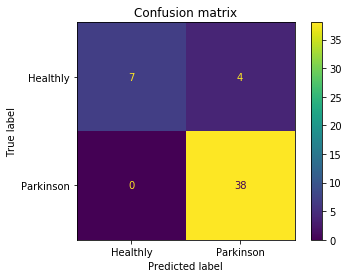

Sensitivity: 100.0%
Specificity: 63.64%


In [26]:
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     display_labels=["Healthly", "Parkinson"])
plt.title("Confusion matrix")
plt.show()
tn, fp, fn, tp = cm.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("Sensitivity: {}%".format(round(sensitivity*100,2)))
print("Specificity: {}%".format(round(specificity*100,2)))

# Conclusion